In [1]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from gesla_functions import *
import os
import sys
import glob

In [2]:
# import pandas as pd

# # Path to your CSV file
# file_path = '/nfs/DGFI8/D/tide-gauges/GESLA_3_meta/GESLA3_ALL_2.csv'

# # Load the CSV file into a DataFrame
# df = pd.read_csv(file_path)

# # Display the first few rows of the DataFrame
# df.head()

# # List all column names
# columns_1 = df.columns.tolist()
# columns_1

# # Path to the second CSV file
# file_path_2 = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.csv'

# # Load the CSV file into a DataFrame
# df_2 = pd.read_csv(file_path_2)

# # Display the first few rows of the DataFrame
# df_2.head()

# # List all column names
# columns_2 = df_2.columns.tolist()
# columns_2

Open the file '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.xlsx'. Rename the following coloumns. "Name" shall become "SITE NAME", "Code" shall become "SITE CODE", "Latitude" into "LATITUDE", "Longitude" into "LONGITUDE", 'Start Date' into 'START DATE/TIME', 'End Date' into 'END DATE/TIME'. Then save it as '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.csv'

In [3]:
import pandas as pd

# Path to the Excel file
input_file_path = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(input_file_path, engine='openpyxl')

# Rename the columns as specified
df.rename(columns={
    'Name': 'SITE NAME',
    'Code': 'SITE CODE',
    'Latitude': 'LATITUDE',
    'Longitude': 'LONGITUDE',
    'Start Date': 'START DATE/TIME',
    'End Date': 'END DATE/TIME'
}, inplace=True)

# Remove the row containing "Peel_Inlet" in 'SITE NAME'
#df = df[df['SITE NAME'] != 'Mandurah_Ocean_Marina']

# Path to save the CSV file
output_file_path = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.csv'

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

# Display the first few rows to confirm changes
df


,SITE NAME,SITE CODE,Country,Contributor Abreviation,Contributor Full,Contributor Website,Contributor contact,Originator,Orginator website,Orginator contact,...,Notes,Usage,Type,Length days,Raw Name,REGION,OLD,OLD.1,OLD.2,Unnamed: 35
0,Home_Island,46280,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Australian Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,...,NaN,No obvious issues,Coastal,11953,home_island,Cocos Islands,BOM,BOM,BOM,NaN
1,Lombrum,56130,PNG,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Australian Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,...,NaN,No obvious issues,Coastal,8549,lombrum,NaN,BOM,BOM,BOM,NaN
2,Honiara,56670,SLB,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Australian Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,...,NaN,Possible datum issues,Coastal,15965,honiara,NaN,BOM,BOM,BOM,NaN
3,Port_Vila,57320,VUT,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Australian Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,...,NaN,No obvious issues,Coastal,9479,port-vila,NaN,BOM,BOM,BOM,NaN
4,Norfolk_Island,57700,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Australian Bureau of Meteorology and Manly Hyd...,https://mhl.nsw.gov.au/Data-OceanTide,tides@bom.gov.au,...,NaN,No obvious issues,Coastal,7420,norfolk_island,Norfolk Island,MHL,BOM,BOM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Mornington_Island,H074011A,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,The State of Queensland,https://www.qld.gov.au/environment/coasts-wate...,Unspecified,...,NaN,No obvious issues,Coastal,3367,mornington-island,Queensland,MSQ,MSQ,MSQ,NaN
121,Jurien_Bay,JUJUR01,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Western Australia Department of Transport,https://www.transport.wa.gov.au,contact.centre@transport.wa.gov.au,...,NaN,No obvious issues,Coastal,10367,jurien-bay,Western Australia,WADOT,WADOT,WADOT,NaN
122,Mandurah_Fishermans_Jetty,MHMAN01,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Western Australia Department of Transport,https://www.transport.wa.gov.au,contact.centre@transport.wa.gov.au,...,NaN,No obvious issues,Coastal,5756,mandurah-fishermans-jetty,Western Australia,WADOT,WADOT,WADOT,NaN
123,Mandurah_Ocean_Marina,MHMAN02,AUS,BOM,Bureau of Meteorology,http://www.bom.gov.au/oceanography/projects/nt...,tides@bom.gov.au,Western Australia Department of Transport,https://www.transport.wa.gov.au,contact.centre@transport.wa.gov.au,...,NaN,No obvious issues,Coastal,4516,mandurah-ocean-marina,Western Australia,WADOT,WADOT,WADOT,NaN


In [4]:
import os
import pandas as pd


# Specify the directory
directory = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update'

# List all filenames in the directory
try:
    filenames = os.listdir(directory)
except FileNotFoundError:
    print(f"Error: The directory '{directory}' was not found.")
    filenames = []

# Function to check if a combined string is in any filename (case-insensitive)
def is_combination_in_filenames(combination, filenames):
    combination_lower = combination.lower()
    filenames_lower = [filename.lower() for filename in filenames]
    return any(combination_lower in filename for filename in filenames_lower)

# Apply the function to each combination of 'SITE NAME' and 'SITE CODE' and print warnings
def check_and_warn(row):
    combination = f"{row['SITE NAME']}-{row['SITE CODE']}-{row['Country']}-bom"
    if not is_combination_in_filenames(combination, filenames):
        print(f"Warning: '{combination}' not found in any filename.")
        return False
    return True

# Add a new column with the result of the check
df['Is_in_Filenames'] = df.apply(check_and_warn, axis=1)

# Print the DataFrame to check the result
#print(df)


This code takes high-frequency tide gauge records from GESLA 3, averages them as hourly records, select for a specific year and region, smooths them by means of a lowess filter to remove tide contributions and correct them for the Dynamic Atmospheric Correction. 

The whole processing is needed to make GESLA dataset comparable to altimetry estimations. The final output of this code can be used in compare_TG_nodac.

Note that the location and naming of the original GESLA data and of the DAC correction from AVISO are hard coded.

The following files will be created by the code (naming changes depending on the choices). Files 2 to 4 are only temporary files and removed at the end of the processing

1) A file containing a selection of the original GESLA data saved in xarray format in the location gesla_output_dir
This is a long process, if needed the parameter "decision_gesla" needs to be set as 'yes'

2) gesla_2021update_northsea.nc 
A selection of the original GESLA dataset in a specific region

3) gesla_2021_selected_update_northsea
Tide gauges with no data after the 15th of April of the selected year are excluded. If two tide gauges are closer than 1.5 km, only the longest record is kept.

4) gesla_2021_selected_lowessupdate_northsea
Lowess filter is applied to remove tides

5) gesla_2021_selected_lowess_dac_correctedupdate_northsea
DAC correction is applied



In [5]:

# Decide whether 
decision_gesla = 'yes'


# Box in which data will be geographically selected 
max_lat = 90
min_lat = -90
max_lon = 180
min_lon = -180 

# Additional naming added in the output products
add = 'australia'

# Location in which the selected gesla data will be saved 
gesla_output_dir = '/nfs/public_ads/Oelsmann/marcello/gesla_v3/'

# Location in which the DAC correction for the tide gauge data will be saved
out_dir='/nfs/public_ads/Oelsmann/marcello/gesla_v3/'

# Years to be considered in the tide gauge dataset
years_in = [2023]
start_date = pd.to_datetime('01-01-2023')

# Location where the corrected tide gauge xarray will be stored
tg_directory = '/DGFI8/H/work_marcello/machine_learning_altimetry_validation/'

In [6]:
def make_gesla(start_date = pd.to_datetime('01-01-2023'),add='update',gesla_output_dir = '/nfs/public_ads/Oelsmann/marcello/gesla_v3/',years_in = [2023]):
    dire = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update/'
    #filenames = os.listdir(dire)
    meta = '/DGFI8/H/work_marcello/giussani_machinelearning_data/GESLA_australia2023update_meta/GESLA3-1_SITES_BOM.csv'    
    gesla = GeslaDataset(meta,dire)
    #filenames = gesla.meta[gesla.meta['end_date_time'] > pd.to_datetime('31-12-2021')].filename.values
    filenames = gesla.meta.filename.values

    # Convert to list
    filenames_list = filenames.tolist()

    # Remove double quotes from filenames
    cleaned_filenames = [filename.strip(" ' ") for filename in filenames_list]

    # Optionally convert back to numpy array
    filenames = cleaned_filenames #np.array(cleaned_filenames)    
    
    
    gesla_all = gesla.files_to_xarray(filenames = filenames,apply_use_flag=True,
                       start_date =start_date, resampling = 'H')
    gesla_all.to_netcdf(gesla_output_dir+'gesla_'+str(years_in[0])+add+'.nc')


def make_DAC_aviso(dataset,DAC_name='',name = 'dac_dif_26296_12.nc',dire = '/DGFI8/D/ib/DAC.AVISO/',years_in = [2021],out_dir='/nfs/public_ads/Oelsmann/marcello/gesla_v3/'):
    testfile = xr.open_dataset(dire +str(years_in[0])+'/'+ name)
    testfile=testfile.rename({'latitude':'lat','longitude':'lon'})
    lon_nw,lat_nw = np.meshgrid(testfile.lon,testfile.lat)
    start = np.full(lon_nw.shape,False)
    id1=[]
    id2=[]
    for lat,lon in zip(dataset.lat.values,dataset.lon.values):
        diff =abs((lon_nw-lon))+ abs((lat_nw-lat))
        out = np.where(diff == np.min(diff))
        id1.append(out[0][0])
        id2.append(out[1][0])
    for year in years_in:
        data  = glob.glob(dire+str(year)+'/*nc')
        DATA=np.empty((len(data),len(id1)))*np.nan
        TIME=pd.DataFrame(np.empty(len(data))*np.nan)
        i=0
        for dataname in data:
            print(i, dataname)
            dat = xr.open_dataset(dataname)

            DATA[i,:]=dat.dac.values[id1,id2]
            TIME.loc[i]=np.datetime64(dat.dac.date[:-4])     
            i=i+1
        DATA = pd.DataFrame(DATA)
        DATA['time']=TIME
        DATA.to_csv(out_dir+'data_for_time_'+str(year))

In [7]:
# Very long process!!!

if decision_gesla == 'yes' :

    make_gesla(start_date ,add, gesla_output_dir, years_in)

brunswick_heads-202403-aus-bom
coffs_harbour-205470-aus-bom
port_macquarie-207420-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file forster-209402-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


forster-209402-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file patonga-212440-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


patonga-212440-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file sydney_port_jackson-213470-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


sydney_port_jackson-213470-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file crookhaven_heads-215408-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


crookhaven_heads-215408-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file batemans_bay_princess_jetty-216410-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


batemans_bay_princess_jetty-216410-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file jervis_bay-216470-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


jervis_bay-216470-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file ulladulla-216471-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


ulladulla-216471-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file bermagui-219470-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


bermagui-219470-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file lakes_entrance_inner_bullock_island-6057a-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",
/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file bremer_bay-bbbre01-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


cape_ferguson-h033007a-aus-bom
cardwell-h035012a-aus-bom
fishermans_landing-h052003b-aus-bom
south_trees-h052026a-aus-bom
thursday_island-h057022b-aus-bom
half_tide_tug_harbour-h060010a-aus-bom
cooktown-h066003a-aus-bom


/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file jurien_bay-jujur01-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",
/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file mandurah_fishermans_jetty-mhman01-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",
/nfs/DGFI8/H/work_marcello/machine_learning_altimetry_validation/gesla_functions.py:436: UserWarning: Duplicate timestamps in file peel_inlet-plpee01-aus-bom were removed.
  "Duplicate timestamps in file " + filename + " were removed.",


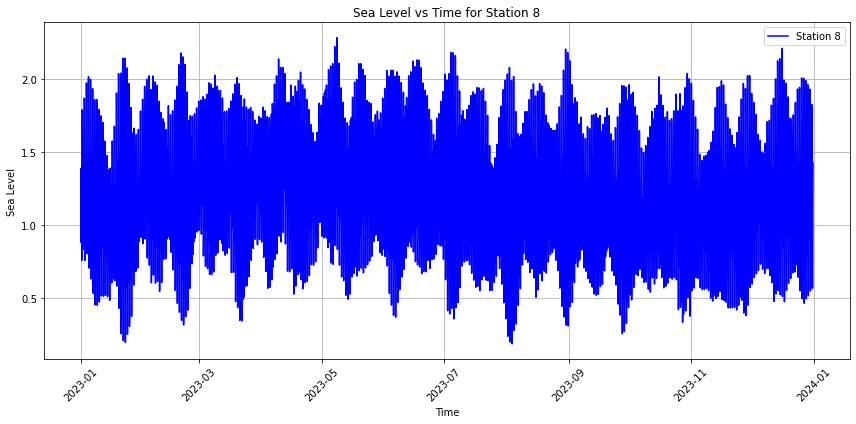

In [8]:
gesla_all = xr.open_dataset(gesla_output_dir+'gesla_'+str(years_in[0])+'australia.nc')
gesla_all

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# List all stations
stations = gesla_all.station.values

# Choose a random station
random_station = np.random.choice(stations)

# Extract data for the random station
data = gesla_all.sel(station=random_station)

# Get the time and sea level data
time = data.date_time.values
sea_level = data.sea_level.values

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time, sea_level, label=f'Station {random_station}', color='blue')
plt.xlabel('Time')
plt.ylabel('Sea Level')
plt.title(f'Sea Level vs Time for Station {random_station}')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

In [9]:
# Geographical limit

gesla_all = gesla_all.where((gesla_all.latitude >= min_lat) & (gesla_all.latitude <= max_lat) & (gesla_all.longitude >= min_lon) & (gesla_all.longitude <= max_lon), drop=True) 
# Loop through variables in the dataset and put unknown data types to string, otherwise "to_netcdf" does not work
for varname in gesla_all.variables:
    if gesla_all[varname].dtype not in ['float64', 'datetime64[ns]','int64']:
        gesla_all[varname] = gesla_all[varname].astype(dtype='U80', copy=False)

filename_and_path_limit = tg_directory+'gesla_'+str(years_in[0])+add+'.nc'
gesla_all.to_netcdf(filename_and_path_limit)
os.chmod(filename_and_path_limit, 0o777)

In [10]:
#Content of select_and_dropdupl
#Note that tide gauges with no data after the 15th of April of the selected year are excluded
#If two tide gauges are closer than 1.5 km, only the longest record is kept

gesla_all_sorted = gesla_all.sortby('site_name')
limit = 1500
counts = gesla_all_sorted['sea_level'].count(dim='date_time').values
coords =np.stack([gesla_all_sorted.latitude.values,gesla_all_sorted.longitude.values])
distancs = []
for coord1 in coords.T:
    distancs.append(haversine(coord1, coords))
distancs = np.vstack(distancs)
pairs = []
reject_indices = []
for i in range(distancs.shape[0]):
    sub = distancs[:,i]
    idx = np.argwhere(   (sub<limit) & (sub!=0) ) 
    if len(idx)>0:
        pairs.append([i,idx[0]])
        if counts[i]<=counts[int(idx[0])]:
            reject_indices.append(i)
        else:
            reject_indices.append(int(idx[0]))
reject_at  = pd.DataFrame(reject_indices).drop_duplicates().values.flatten()
gesla_selected = gesla_all_sorted.sel({'station':~np.isin(np.arange(distancs.shape[0]),reject_at)})
mask = (gesla_selected['date_time'].to_dataframe()['date_time'] >  pd.to_datetime('04-15-'+str(years_in[0]))).values
counts_after_april = gesla_selected.sel({'date_time':mask}).count(dim='date_time')['sea_level']
gesla_selected_final = gesla_selected.where(counts_after_april > 1,drop=True)
gesla_selected_final.attrs={'comment':'duplicates are rejected; longest TG record of a TG pair within 1.5km is kept. TG must contain data after 04-15-. Use-flag applied. Hourly averaged.'}

filename_and_path_dropupl = tg_directory+'gesla_'+str(years_in[0])+'_selected_'+add+'.nc'
gesla_selected_final.to_netcdf(filename_and_path_dropupl)
os.chmod(filename_and_path_dropupl, 0o777)

In [11]:
#apply_lowess_filter
import copy
lowess = sm.nonparametric.lowess
gesla_selected_final=xr.open_dataset(tg_directory+'gesla_'+str(years_in[0])+'_selected_'+add+'.nc')
gesla_selected_final['sea_level_lowess']=copy.deepcopy(gesla_selected_final['sea_level'])
frac = 40/len(gesla_selected_final.date_time)
x=np.arange(len(gesla_selected_final.date_time))
for i in range(len(gesla_selected_final.station)):
    y = gesla_selected_final['sea_level'][i,:].values
    w = lowess(y, x, frac=frac)
    gesla_selected_final['sea_level_lowess'][i,np.isin(x,w[:,0])] = w[:,1]
    print(i)
    
filename_and_path_lowess = tg_directory+'gesla_'+str(years_in[0])+'_selected_lowess'+add+'.nc'
gesla_selected_final.to_netcdf(filename_and_path_lowess)
os.chmod(filename_and_path_lowess, 0o777)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [12]:
gesla_selected_final

<xarray.Dataset>
Dimensions:                  (date_time: 8759, dim_1: 2, station: 18)
Coordinates:
  * station                  (station) int64 7 10 0 11 12 1 17 ... 4 2 14 5 15 9
  * date_time                (date_time) datetime64[ns] 2023-01-01T01:00:00 ....
  * dim_1                    (dim_1) object 'number_of_years' 'number_of_years'
Data variables: (12/39)
    sea_level                (station, date_time) float64 ...
    qc_flag                  (station, date_time) float64 ...
    use_flag                 (station, date_time) float64 ...
    site_name                (station) object ...
    site_code                (station) object ...
    country                  (station) object ...
    ...                       ...
    region                   (station) object ...
    old                      (station) object ...
    old.1                    (station) object ...
    old.2                    (station) object ...
    unnamed:_35              (station) float64 ...
    sea_level_lowess         (station, date_time) float64 ...
Attributes:
    comment:  duplicates are rejected; longest TG record of a TG pair within ...

In [13]:
#compute_dac_gesla
gesla = xr.open_dataset(tg_directory+'gesla_'+str(years_in[0])+'_selected_lowess'+add+'.nc')
dataset= gesla
dataset = dataset.rename({'latitude':'lat','longitude':'lon'})
lon= dataset['lon']
lon[lon <0 ] = lon[lon <0 ]+360
dataset['lon'][:] = lon



# Define the directory path
directory_path = '/DGFI8/D/ib/DAC.AVISO/'+str(years_in[0])+'/'
print(directory_path)

# Define the pattern to match files that start with "dac_dif"
pattern = os.path.join(directory_path, 'dac_dif*.nc')

# List all files matching the pattern
files = glob.glob(pattern)

# Check if there are any files matching the pattern
if files:
    # Randomly select a file from the list
    name = np.random.choice(files)
    
    # Extract the filename from the full path
    name = os.path.basename(name)
    
    print(name)




make_DAC_aviso(dataset,DAC_name='',name = name ,dire = '/DGFI8/D/ib/DAC.AVISO/',years_in = years_in ,out_dir='/nfs/public_ads/Oelsmann/marcello/gesla_v3/')

/DGFI8/D/ib/DAC.AVISO/2023/
dac_dif_26690_00.nc
0 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27024_18.nc
1 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26837_18.nc
2 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26828_18.nc
3 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26993_00.nc
4 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26988_06.nc
5 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26889_06.nc
6 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27012_06.nc
7 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27018_12.nc
8 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27002_00.nc
9 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26978_00.nc
10 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26992_00.nc
11 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26953_00.nc
12 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26958_12.nc
13 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26968_18.nc
14 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26843_12.nc
15 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26681_12.nc
16 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26976_18.nc
17 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26770_00.nc
18 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26814_00.nc
19 /DGFI8/D/

162 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26672_18.nc
163 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26983_18.nc
164 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26646_00.nc
165 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26868_00.nc
166 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26724_06.nc
167 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27026_00.nc
168 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26771_00.nc
169 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26917_00.nc
170 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26723_06.nc
171 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26762_12.nc
172 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26663_12.nc
173 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26906_18.nc
174 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26994_00.nc
175 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26948_12.nc
176 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27025_18.nc
177 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26881_06.nc
178 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26741_12.nc
179 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26774_00.nc
180 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26914_00.nc
181 /DGFI8/D/ib/DAC.AVISO/2023/

323 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26829_06.nc
324 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26992_18.nc
325 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26789_00.nc
326 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26677_06.nc
327 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26746_18.nc
328 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26785_06.nc
329 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27000_18.nc
330 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26647_06.nc
331 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26853_12.nc
332 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26998_00.nc
333 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27009_18.nc
334 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26735_18.nc
335 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26759_00.nc
336 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26839_00.nc
337 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26974_12.nc
338 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26831_06.nc
339 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26788_06.nc
340 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26703_00.nc
341 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26800_12.nc
342 /DGFI8/D/ib/DAC.AVISO/2023/

486 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26752_06.nc
487 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26727_00.nc
488 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26745_06.nc
489 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26799_12.nc
490 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26871_12.nc
491 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26935_18.nc
492 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26718_12.nc
493 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26851_06.nc
494 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26880_06.nc
495 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26835_06.nc
496 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26878_06.nc
497 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26652_06.nc
498 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26654_06.nc
499 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26902_12.nc
500 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26806_06.nc
501 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26861_06.nc
502 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26717_18.nc
503 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26769_00.nc
504 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26850_00.nc
505 /DGFI8/D/ib/DAC.AVISO/2023/

647 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26776_06.nc
648 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26859_06.nc
649 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26993_06.nc
650 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26795_12.nc
651 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26707_18.nc
652 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26809_18.nc
653 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26786_18.nc
654 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26779_18.nc
655 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26892_12.nc
656 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26846_06.nc
657 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26779_12.nc
658 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26938_00.nc
659 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26920_00.nc
660 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26805_18.nc
661 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26985_00.nc
662 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26773_12.nc
663 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26853_06.nc
664 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26768_12.nc
665 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26729_06.nc
666 /DGFI8/D/ib/DAC.AVISO/2023/

828 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26987_12.nc
829 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26833_12.nc
830 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26753_06.nc
831 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26707_12.nc
832 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26699_18.nc
833 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26820_12.nc
834 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26693_06.nc
835 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26662_06.nc
836 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26921_12.nc
837 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26700_12.nc
838 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26696_18.nc
839 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26711_06.nc
840 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26725_12.nc
841 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26708_06.nc
842 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26671_00.nc
843 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26886_00.nc
844 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26670_18.nc
845 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27003_00.nc
846 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26827_00.nc
847 /DGFI8/D/ib/DAC.AVISO/2023/

1009 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26971_00.nc
1010 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26758_18.nc
1011 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26955_00.nc
1012 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26764_06.nc
1013 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26649_06.nc
1014 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26999_06.nc
1015 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26722_00.nc
1016 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26892_18.nc
1017 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26930_12.nc
1018 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26752_18.nc
1019 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27013_00.nc
1020 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26777_18.nc
1021 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26694_18.nc
1022 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26814_18.nc
1023 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26967_00.nc
1024 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26741_00.nc
1025 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26950_12.nc
1026 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26796_06.nc
1027 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26837_12.nc
1028 /DGFI8/

1170 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26732_00.nc
1171 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26926_00.nc
1172 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26737_12.nc
1173 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26690_18.nc
1174 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26980_18.nc
1175 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26757_06.nc
1176 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26890_06.nc
1177 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26669_00.nc
1178 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26925_12.nc
1179 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26886_12.nc
1180 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26976_00.nc
1181 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26709_12.nc
1182 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26804_18.nc
1183 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26899_18.nc
1184 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26832_00.nc
1185 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26815_00.nc
1186 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26790_12.nc
1187 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26751_06.nc
1188 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26868_18.nc
1189 /DGFI8/

1333 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26838_06.nc
1334 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27024_00.nc
1335 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26857_18.nc
1336 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26684_06.nc
1337 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26647_18.nc
1338 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26705_06.nc
1339 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26894_06.nc
1340 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26668_18.nc
1341 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26683_18.nc
1342 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26741_18.nc
1343 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26879_12.nc
1344 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26774_06.nc
1345 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26975_00.nc
1346 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26981_06.nc
1347 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26736_00.nc
1348 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26907_18.nc
1349 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26914_18.nc
1350 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26994_12.nc
1351 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26838_00.nc
1352 /DGFI8/

1493 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26892_00.nc
1494 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26763_12.nc
1495 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26689_06.nc
1496 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26833_00.nc
1497 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26763_18.nc
1498 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_27010_00.nc
1499 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26906_00.nc
1500 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26890_12.nc
1501 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26801_06.nc
1502 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26930_18.nc
1503 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26925_06.nc
1504 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26822_18.nc
1505 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26701_00.nc
1506 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26869_06.nc
1507 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26957_00.nc
1508 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26852_18.nc
1509 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26728_12.nc
1510 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26885_06.nc
1511 /DGFI8/D/ib/DAC.AVISO/2023/dac_dif_26903_06.nc
1512 /DGFI8/

In [14]:
# Here I first need to apply lowess!!!

#correct_gesla_for_dac()

dire = '/DGFI8/D/ib/DAC.AVISO/'


gesla = xr.open_dataset(tg_directory+'gesla_'+str(years_in[0])+'_selected_lowess'+add+'.nc')
dac = pd.read_csv(out_dir+'data_for_time_'+str(years_in[0])).sort_values(by='time')
dac=dac.set_index('time')
dac.index = pd.to_datetime(dac.index)
dac_sub = dac[(pd.DatetimeIndex(dac.index.values) >= pd.Timestamp(gesla['date_time'][0].values)) & (pd.DatetimeIndex(dac.index.values) <= pd.Timestamp(gesla['date_time'][-1].values))]
gesla_time = gesla.loc[dict(date_time=slice(dac.index[0], dac.index[-1]))]
gesla_time['dac'] = copy.deepcopy(gesla_time['sea_level_lowess'])*np.nan
dac_res = (dac_sub.resample('1H').mean()).interpolate(method='cubic',limit=10)
gesla_time['dac'][:,np.isin(gesla_time.date_time,dac_res.index)] = dac_res.iloc[:,1:].values.T
gesla_time['sla_dac']=gesla_time['sea_level_lowess']-gesla_time['dac']
gesla_time['sla_dac_no_loess']=gesla_time['sea_level']-gesla_time['dac']

filename_and_path = tg_directory+'gesla_'+str(years_in[0])+'_selected_lowess_dac_corrected'+add+'.nc'
gesla_time.to_netcdf(filename_and_path)
os.chmod(filename_and_path, 0o777)

os.remove(filename_and_path_limit)
os.remove(filename_and_path_dropupl)
os.remove(filename_and_path_lowess)

In [15]:
gesla_time

<xarray.Dataset>
Dimensions:                  (date_time: 8754, dim_1: 2, station: 18)
Coordinates:
  * station                  (station) int64 7 10 0 11 12 1 17 ... 4 2 14 5 15 9
  * date_time                (date_time) datetime64[ns] 2023-01-01T01:00:00 ....
  * dim_1                    (dim_1) object 'number_of_years' 'number_of_years'
Data variables: (12/42)
    sea_level                (station, date_time) float64 ...
    qc_flag                  (station, date_time) float64 ...
    use_flag                 (station, date_time) float64 ...
    site_name                (station) object ...
    site_code                (station) object ...
    country                  (station) object ...
    ...                       ...
    old.2                    (station) object ...
    unnamed:_35              (station) float64 ...
    sea_level_lowess         (station, date_time) float64 ...
    dac                      (station, date_time) float64 nan nan ... -0.1042
    sla_dac                  (station, date_time) float64 nan nan ... nan nan
    sla_dac_no_loess         (station, date_time) float64 nan nan ... nan nan
Attributes:
    comment:  duplicates are rejected; longest TG record of a TG pair within ...